Importing my drive to be able to use my bacteria images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [83]:
%cd /content/drive//MyDrive/NewGitRepo

/content/drive/MyDrive/NewGitRepo


In [106]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Bacteria_keyPoints.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git config --global user.email "ricklesmasar@gmail.com"
!git config --global user.name "Riki-Masar"

In [114]:
!git push https://github.com/Riki-Masar

remote: Not Found
fatal: repository 'https://github.com/Riki-Masar/' not found


Importing necessary libraries

In [ ]:
import pandas as pd
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Path to the folder containing the bacteria images
images_dir = "/content/drive/MyDrive/Key_points_overFit"

# Path to the CSV file containing the points data(I used VGG software)
csv_file_path = '/content/drive/MyDrive/overFit_keyPoints_csv.csv'


In [ ]:
# Read the CSV file containing the points information
df = pd.read_csv(csv_file_path)
df

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,Image1_overFit.jpg,1052,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,0,"{""name"":""point"",""cx"":1,""cy"":13}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
1,Image1_overFit.jpg,1052,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,1,"{""name"":""point"",""cx"":57,""cy"":12}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
2,Image2_overFit.jpg,1035,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,0,"{""name"":""point"",""cx"":0,""cy"":14}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
3,Image2_overFit.jpg,1035,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,1,"{""name"":""point"",""cx"":57,""cy"":11}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
4,Image3_overFit.jpg,1162,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,0,"{""name"":""point"",""cx"":1,""cy"":19}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
5,Image3_overFit.jpg,1162,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,1,"{""name"":""point"",""cx"":60,""cy"":14}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
6,Image4_overFit.jpg,1477,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,0,"{""name"":""point"",""cx"":2,""cy"":15}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
7,Image4_overFit.jpg,1477,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,1,"{""name"":""point"",""cx"":125,""cy"":18}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
8,Image5_overFit.jpg,913,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,0,"{""name"":""point"",""cx"":2,""cy"":11}","{""name"":""not_defined"",""type"":""unknown"",""image_..."
9,Image5_overFit.jpg,913,"{""caption"":"""",""public_domain"":""no"",""image_url""...",2,1,"{""name"":""point"",""cx"":57,""cy"":13}","{""name"":""not_defined"",""type"":""unknown"",""image_..."


The following section of the code parses and organizes the key points data, which is crucial for correctly associating images with their key points and using this data for training and evaluating the model.

In [ ]:
# Parse the points and store them in a dictionary
points_dict = {}
for index, row in df.iterrows():
    filename = row['filename']
    shape_attributes = eval(row['region_shape_attributes'])
    cx, cy = shape_attributes['cx'], shape_attributes['cy']
    if filename not in points_dict:
        points_dict[filename] = []
    points_dict[filename].append((cx, cy))


This section of code reads and visualizes images from the specified directory. For each image, it constructs the file path, loads the image using OpenCV, and checks if it was loaded successfully. If so, it displays the image with Matplotlib, showing the filename as the title. This process helps ensure that images are correctly loaded and allows for a visual inspection before further processing or model training.

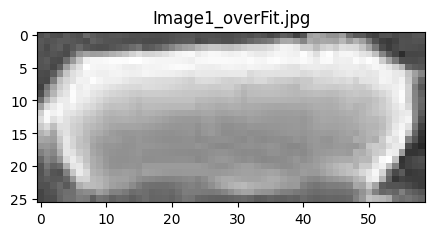

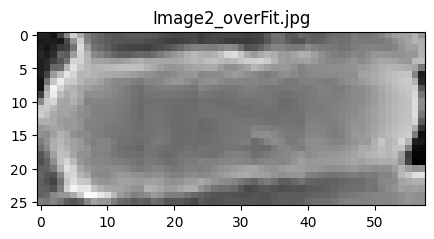

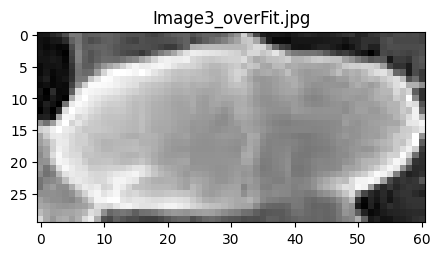

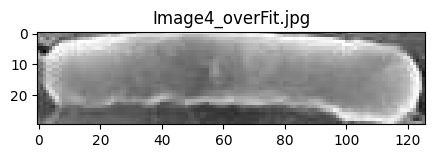

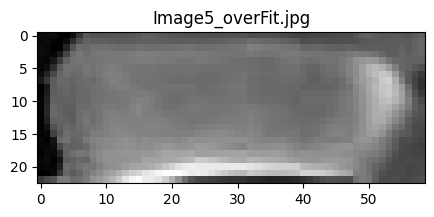

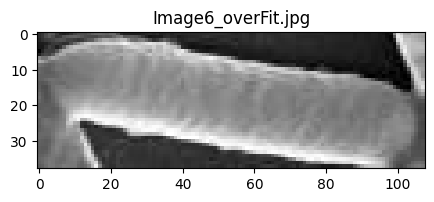

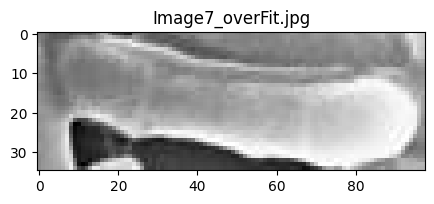

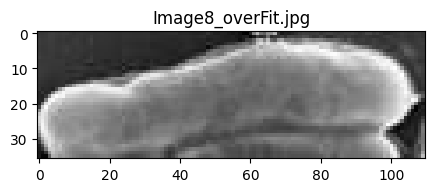

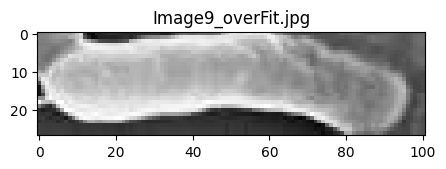

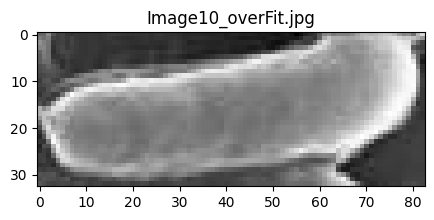

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Iterate over each image and its points in the dictionary
for filename, points in points_dict.items():
    # Construct the path to the image
    image_path = os.path.join(images_dir, filename)
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Image {filename} not found at {image_path}")
        continue

    # Display the image using Matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(filename)
    plt.show()

    # Save the unannotated image to the output directory
    output_image_path = os.path.join('/content/drive/MyDrive/Unannotated_Images', filename)
    os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
    cv2.imwrite(output_image_path, image)


I used a CNN model to train the images. I used the MobileNetV2 pretrained model after trying various other models like ResNet50, VGG etc.

In [ ]:
# Define your model
base_model = keras.applications.MobileNetV2(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False,
)
base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.0)(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dense(128, activation="relu")(x)
outputs = keras.layers.Dense(4)(x)  # Assuming 4 outputs (x1, y1, x2, y2)
model = keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

# Print model summary
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,619,332 (9.99 MB)

 Trainable params: 361,348 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Preprocess image function
def preprocess_image(image):
    h, w, _ = image.shape
    max_dim = max(h, w)
    padded_image = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
    padded_image[:h, :w, :] = image

    resized_image = cv2.resize(padded_image, (224, 224))
    processed_image = resized_image.astype(np.float32) / 255.0  # Normalize

    return processed_image

# Load and preprocess images
images = []
points = []
original_image_sizes = []  # List to store original image sizes

for filename, pts in points_dict.items():
    image_path = os.path.join(images_dir, filename)
    print(f"Processing image: {image_path}")  # Debugging print statement
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image {filename} not found at {image_path}")
        continue
    original_image_sizes.append(image.shape[:2])  # Store original size (height, width)
    processed_image = preprocess_image(image)
    images.append(processed_image)
    points.append(np.array(pts).flatten())  # Flatten the points to match model output


# Convert lists to numpy arrays
images = np.array(images)
points = np.array(points)
print(images.shape)

Processing image: /content/drive/MyDrive/Key_points_overFit/Image1_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image2_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image3_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image4_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image5_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image6_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image7_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image8_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image9_overFit.jpg
Processing image: /content/drive/MyDrive/Key_points_overFit/Image10_overFit.jpg
(10, 224, 224, 3)


In [ ]:
# Train the model on all data
history = model.fit(images, points, epochs=50, batch_size=4)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 1555.4105 - mean_squared_error: 1555.4105
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 159.6237 - mean_squared_error: 159.6237
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 448.0036 - mean_squared_error: 448.0036
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 169.9112 - mean_squared_error: 169.9112
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 204.9058 - mean_squared_error: 204.9058
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 113.1357 - mean_squared_error: 113.1357
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - loss: 171.4637 - mean_squared_error: 171.4637
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 76.8164 - mean_squared_error: 76.8164
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 90.4814 - mean_squared_error: 90.4814
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 56.1795 - mean_squared_error: 56.1795
Epoch 11/50
3/3 ━━━━━━━━━━━

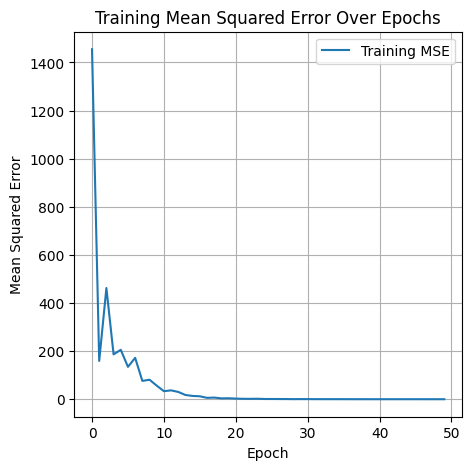

In [ ]:
# Plot the training MSE
plt.figure(figsize=(5, 5))
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Mean Squared Error Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Testing the model on the training data

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


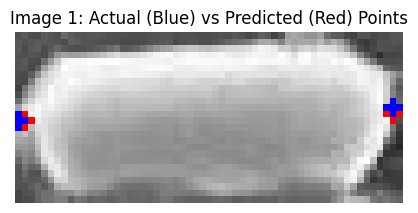

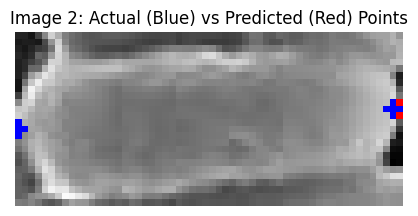

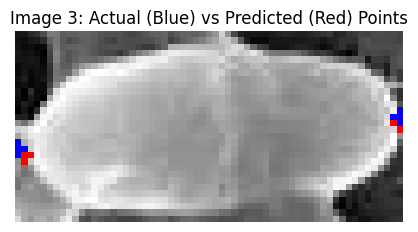

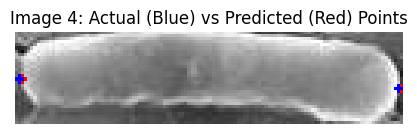

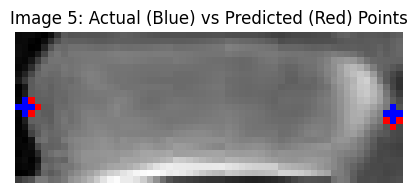

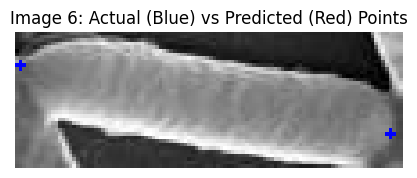

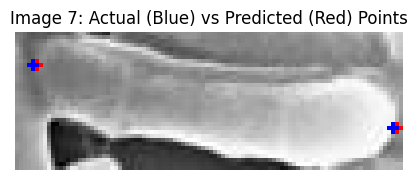

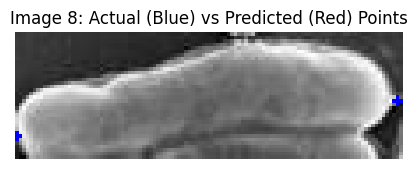

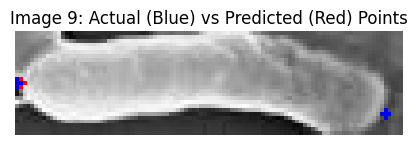

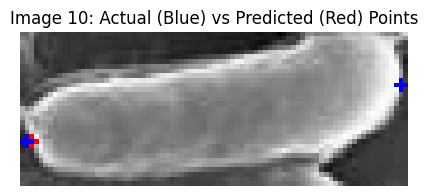

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load original images and points
original_images = []  # Populate this with your original images
original_points = []  # Populate this with your actual points

# Preprocess the original images to match the format used during training
for filename in points_dict.keys():
    image_path = os.path.join(images_dir, filename)
    image = cv2.imread(image_path)
    if image is not None:
        original_images.append(image)
        # Retrieve the corresponding points for this image from the dictionary
        original_points.append(points_dict[filename])

# Example placeholder for predictions (replace with your actual prediction code)
predictions = model.predict(images)  # Replace with your actual model prediction

# Visualize points on original images
for i in range(len(original_images)):
    image = original_images[i].copy()  # Make a copy to preserve the original image

    # Assuming original_points is structured correctly with points for each image
    pts_actual = original_points[i]

    # Reshape predictions to match the desired format (2 points per image, each with x and y coordinates)
    pred_pts = predictions[i].reshape(-1, 2)

    # Draw actual points in blue
    for pt in pts_actual:
        cx, cy = pt
        cv2.circle(image, (int(cx), int(cy)), radius=1, color=(0, 0, 255), thickness=-1)

    # Draw predicted points in red
    for pt in pred_pts:
        cx, cy = pt
        cv2.circle(image, (int(cx), int(cy)), radius=1, color=(255, 0, 0), thickness=-1)

    # Display the image with points
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1}: Actual (Blue) vs Predicted (Red) Points")
    plt.axis('off')
    plt.show()


Testing model on test images

(4, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


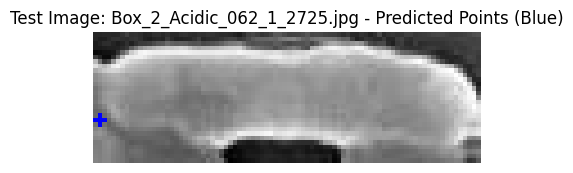

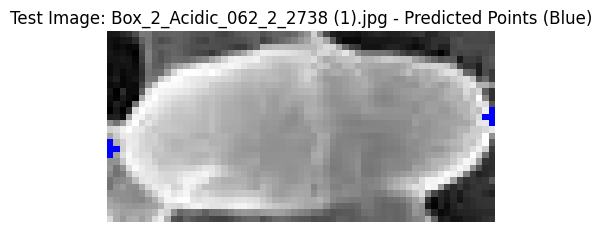

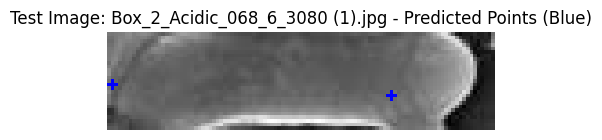

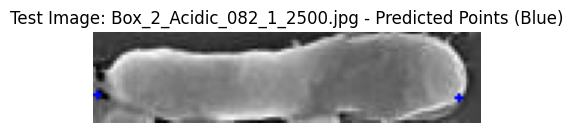

In [ ]:
# Test images path
test_images_dir = "/content/drive/MyDrive/OverFit_Test_Images"

# Load and preprocess test images
test_images = []
test_image_filenames = []
for filename in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, filename)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Test Image {filename} not found at {image_path}")
        continue
    processed_image = preprocess_image(image)
    test_images.append(processed_image)
    test_image_filenames.append(filename)

test_images = np.array(test_images)
print(test_images.shape)

# Make predictions on test images
predictions = model.predict(test_images)

# Visualize predicted points on test images
for i, filename in enumerate(test_image_filenames):
    image_path = os.path.join(test_images_dir, filename)
    image = cv2.imread(image_path)
    if image is None:
        continue

    # Reshape predictions to match the desired format (2 points per image, each with x and y coordinates)
    pred_pts = predictions[i].reshape(-1, 2)

    # Draw predicted points in red
    for pt in pred_pts:
        cx, cy = pt
        cv2.circle(image, (int(cx), int(cy)), radius=1, color=(255, 0, 0), thickness=-1)

    # Display the image with points
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Test Image: {filename} - Predicted Points (Blue)")
    plt.axis('off')
    plt.show()
